In [ ]:
#Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading Dataset:
true = pd.read_csv("/content/true.csv")
fake = pd.read_csv("/content/fake.csv")

In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true.shape

(21417, 4)

In [ ]:
fake.shape

(23481, 4)

In [ ]:
true['label'] = 1

In [ ]:
fake['label'] = 0

##DataFrame:

In [ ]:
frames = [true.loc[:5000][:], fake.loc[:5000][:]]

In [ ]:
df = pd.concat(frames)

In [ ]:
df.shape

(10002, 5)

In [ ]:
X = df.drop('label', axis =1)
Y = df['label']

In [ ]:
df = df.dropna()
df1 = df.copy()

In [ ]:
df1.reset_index(inplace=True)
df1.head()

,index,title,text,subject,date,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
df1['label'].value_counts()

1    5001
0    5001
Name: label, dtype: int64

##EDA:

<ipython-input-19-06f4a0025730>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data = df, palette= custom_palette)
<ipython-input-19-06f4a0025730>:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='label', data = df, palette= custom_palette)
<ipython-input-19-06f4a0025730>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(class_names)


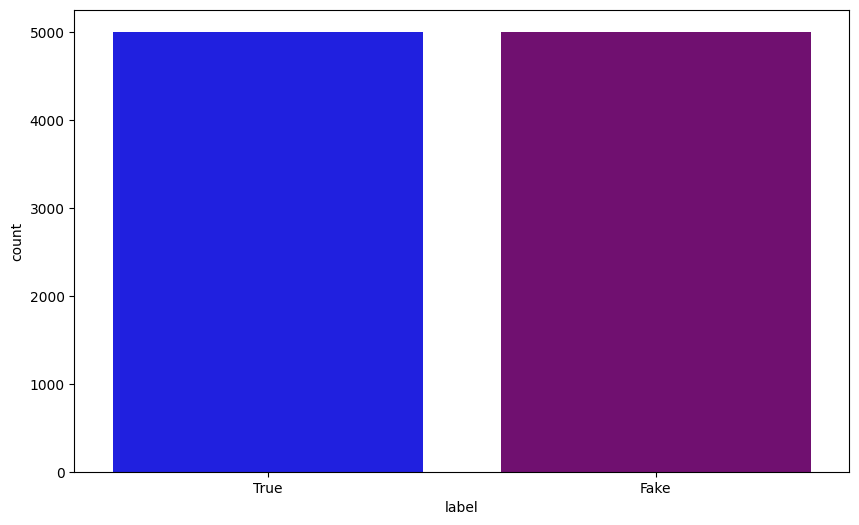

In [ ]:
#Data Distribution:
plt.figure(figsize=(10,6))
class_names = ['True', 'Fake']
custom_palette = ['Blue', 'Purple', 'teal']
sns.countplot(x='label', data = df, palette= custom_palette)

plt.gca().set_xticklabels(class_names)
plt.show()

In [ ]:
from matplotlib.font_manager import FontProperties

def visualize_text_data(data, title):
  df['text_length'] = df['text'].apply(len)

  df['news_word_count'] = df['text'].apply(lambda x: len(str(x).split()))

  plt.figure(figsize=(16,8))

  custom_font = FontProperties(family='serif', style = 'normal', size =14, weight='bold')

  plt.subplot(1,2,1)
  n, bins, patches = plt.hist(df['text_length'], bins=10, color='mediumaquamarine', edgecolor='black', alpha=0.5, label='News Article')
  plt.grid(linestyle = '--',alpha = 0.6)
  plt.xlabel("Text Length", fontsize = 10, fontproperties=custom_font, color = 'black')
  plt.ylabel("Frequency", fontsize = 10, fontproperties = custom_font, color='black')
  plt.title(f'Text Length DIstribution for {title}', fontsize = 12, fontproperties = custom_font, color='black')

  for bin_val, freq in zip(bins, n):
    plt.text(bin_val+100, freq+20, f'{int(freq)}', ha =  'left', va= 'baseline', fontsize=12, fontproperties=custom_font)
    plt.subplot(1,2,2)
    n, bins, patches = plt.hist(df['news_word_count'], bins =10, color = 'violet', edgecolor='black', alpha = 0.7, label='News Article')
    plt.grid(linestyle= '--', alpha = 0.6)
    plt.xlabel("Word Count", fontsize= 10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')
    plt.title(f'Word COunt Distribution for {title}', fontsize =12, fontproperties = custom_font, color='black')

    for bin_val, freq in zip(bins,n):
      plt.text(bin_val+20, freq+20, f'{int(freq)}', ha = 'left', va= 'baseleine', fontsize=12, fontproperties= custom_font)
      plt.tight_layout()
      plt.show()

In [ ]:
def visualize_text_data(data, title):
    # Calculate text length for each entry in the 'text' column and store the results in a new column
    data['text_length'] = data['text'].apply(len)

    # Calculate word count for each entry in the 'text' column and store the results in a new column
    data['news_word_count'] = data['text'].apply(lambda x: len(str(x).split()))

    # Create a figure with a larger size
    plt.figure(figsize=(16, 8))

    # Define a custom font with a nice appearance
    custom_font = FontProperties(family='serif', style='normal', size=14, weight='bold')

    # First subplot for text length distribution
    plt.subplot(1, 2, 1)
    n, bins, patches = plt.hist(data['text_length'], bins=10, color='mediumaquamarine', edgecolor='black', alpha=0.5, label='News Article')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("Text Length", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')
    plt.title(f'Text Length Distribution for {title}', fontsize=12, fontproperties=custom_font, color='black')

    # Annotate the plot with bin values (vertical text)
    for bin_val, freq in zip(bins, n):
        plt.text(bin_val+100, freq+20, f'{int(freq)}', ha='left', va='baseline', fontsize=12, fontproperties=custom_font)

    # Second subplot for word count distribution
    plt.subplot(1, 2, 2)
    n, bins, patches = plt.hist(data['news_word_count'], bins=10, color='violet', edgecolor='black', alpha=0.7, label='News Article')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("Word Count", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')
    plt.title(f'Word Count Distribution for {title}', fontsize=12, fontproperties=custom_font, color='black')

    # Annotate the plot with bin values (vertical text)
    for bin_val, freq in zip(bins, n):

        plt.text(bin_val+20, freq+20, f'{int(freq)}', ha='left', va='baseline', fontsize=12, fontproperties=custom_font)

    # Adjust the layout for subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

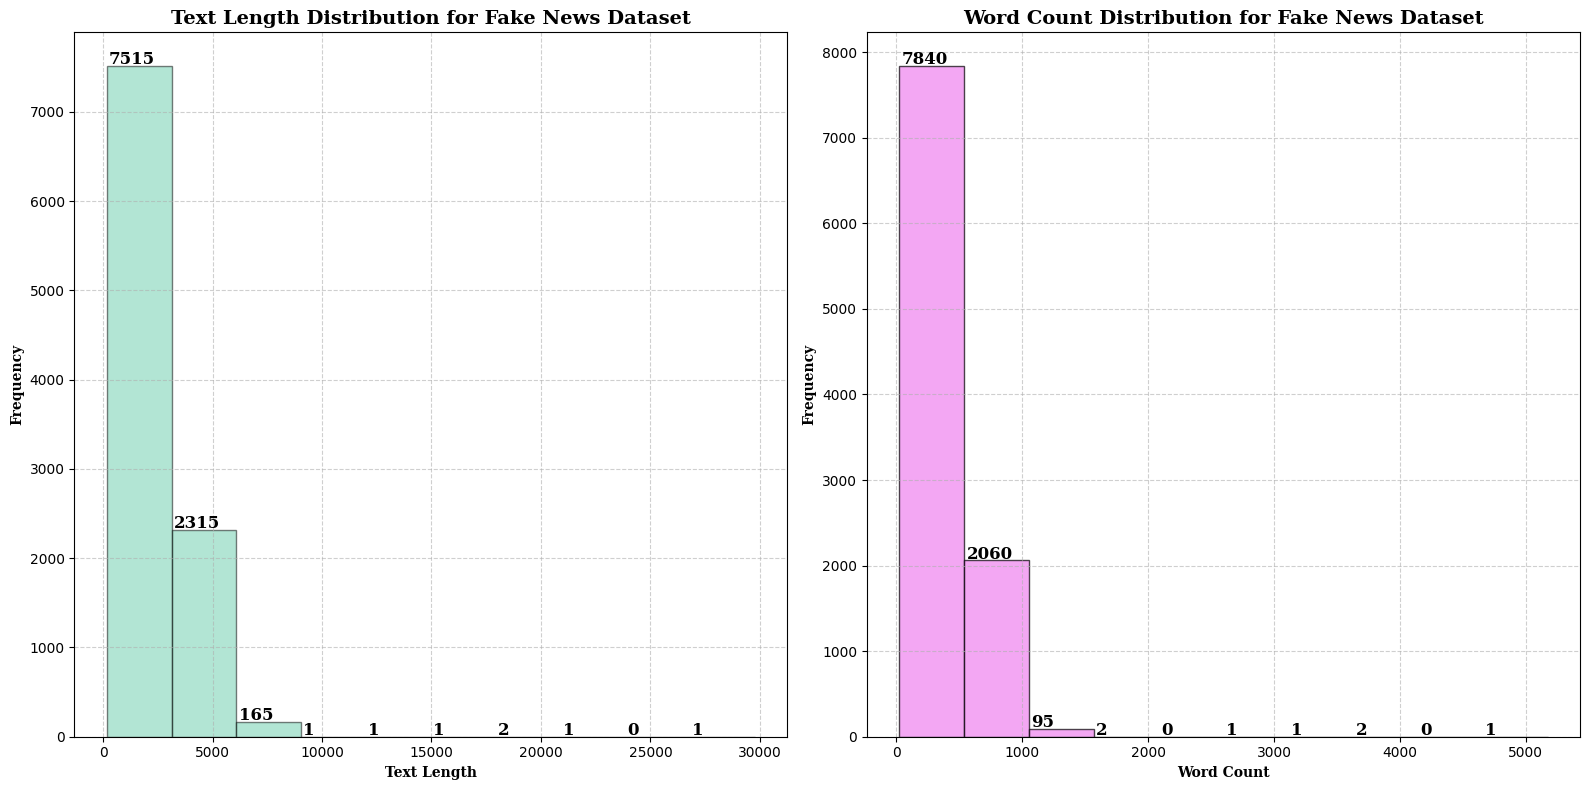

In [ ]:
visualize_text_data(df, 'Fake News Dataset')

In [ ]:
from wordcloud import WordCloud

def create_wordcloud(data, column, title):
  wordcloud = WordCloud(width=800, height=400, background_color = 'black', colormap='PuBu_r', collocations = False).generate(' '.join(data[column]))
  plt.figure(figsize=(8,4))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Word Cloud for {column} in {title}', fontsize=16, color='black')
  plt.axis('off')
  plt.show()

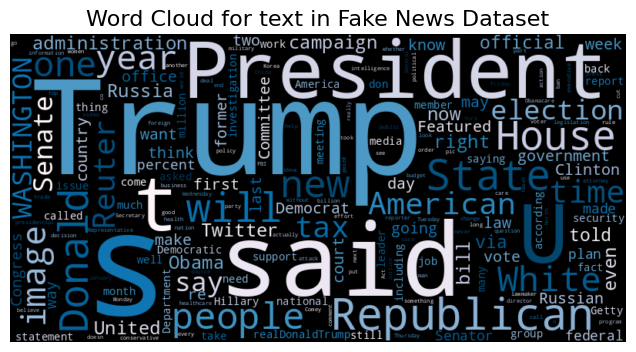

In [ ]:
create_wordcloud(df,'text','Fake News Dataset')

##Data Preprocessing:

In [27]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps  = PorterStemmer()

In [28]:
import re
import nltk
nltk.download('stopwords')

corpus = []
for i in range(0,len(df1)):
  review = re.sub('[^a-zA-Z]', ' ', df1['text'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
#TF-IDF Vectorizer:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features = 5000, ngram_range= (1,3))

In [30]:
X = tfidf_v.fit_transform(corpus).toarray()
Y = df1['label']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

##Machine Learning Models:

In [32]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter = 1000)

In [35]:
from sklearn import metrics
import itertools

classifier.fit(X_train, Y_train)
pred = classifier.predict(X_test)

score = classifier.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy: %0.3f" %score)

accuracy: 0.998


In [38]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap = plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion matrix, Without Normalization")

  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,cm[i,j], horizontalalignment='center',color='white' if cm [i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, Without Normalization


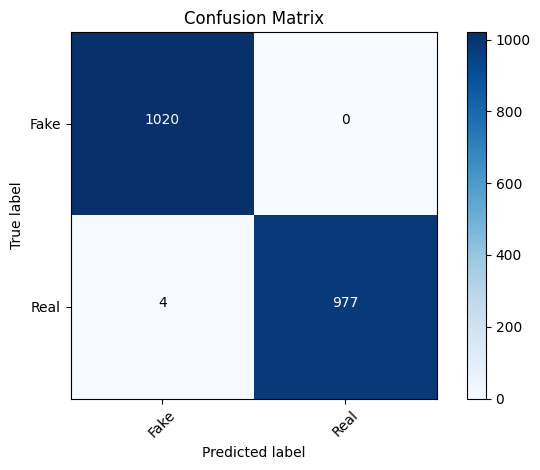

In [39]:
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

##Validation:

In [41]:
review = re.sub('[^a-zA-Z]', ' ', fake['text'][13070])
review = review.lower()
review = review.split()

review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'mani c word hillari compet one ouch'

In [42]:
val = tfidf_v.transform([review]).toarray()

In [43]:
classifier.predict(val)

array([0])

##Save Model and Vectorizer:

In [44]:
import pickle
pickle.dump(classifier, open('model2.pkl', 'wb'))
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

##Load Model and Vectoizer to predict the Previous Datapoint:


In [47]:
joblib_model = pickle.load(open('model2.pkl', 'rb'))
joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))
val_pkl = joblib_vect.transform([review]).toarray()
test_pred = joblib_model.predict(val_pkl)

if test_pred == 0:
  print("Fake News")
else:
  print("Real News")

Fake News
